# Resampling

https://youtu.be/p_Fn_BksF9k?list=PLQVvvaa0QuDc-3szzjeP6N6b0aDrrKyL-

In [1]:
import quandl;
import pandas as pd;

import pickle;

import matplotlib.pyplot as plt;
from matplotlib import style;
style.use("ggplot");

In [2]:
api_key = open("quandlapikey.txt", "r").read();

def state_list():
    fiddy_states = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states");
    return fiddy_states[0][0][1:];

def grap_initial_state_data_start_pct():
    states = state_list();
    main_df = pd.DataFrame();
    for ab in states:
        querry = "FMAC/HPI_" + ab;
        df = quandl.get(querry, authtoken = api_key);
        df.columns = [ab];        
        df[ab] = (df[ab] - df[ab][0]) / df[ab][0] * 100.0; # <-------
        if main_df.empty:
            main_df = df;
        else:
            main_df = main_df.join(df);

    pickle_out = open("./data/fiddy_states.pickle", "wb");
    pickle.dump(main_df, pickle_out);
    pickle_out.close();
    
def HPI_Benchmark():
    df = quandl.get("FMAC/HPI_USA", authtoken = api_key);
    df.columns = ["US"];        
    df["US"] = (df["US"] - df["US"][0]) / df["US"][0] * 100.0; # <-------
    return df;

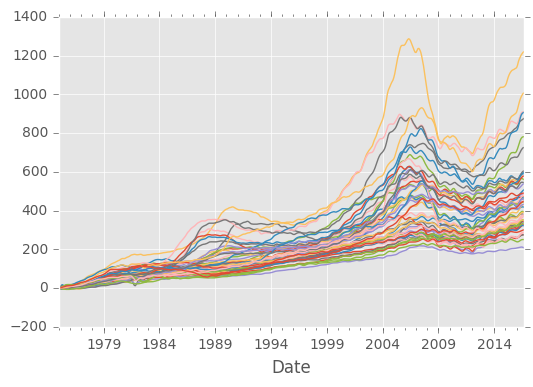

In [3]:
#grap_initial_state_data_start_pct(); 
HPI_data = pd.read_pickle("./data/fiddy_states.pickle");

HPI_data.plot();
plt.legend().remove();
plt.show();

In [21]:
TX_year = HPI_data["TX"].resample("A").mean(); #why is it so ugly!!!
print(TX_year.head());
#http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases

Date
1975-12-31     4.001836
1976-12-31    11.464859
1977-12-31    22.668530
1978-12-31    40.861312
1979-12-31    63.444913
Freq: A-DEC, Name: TX, dtype: float64


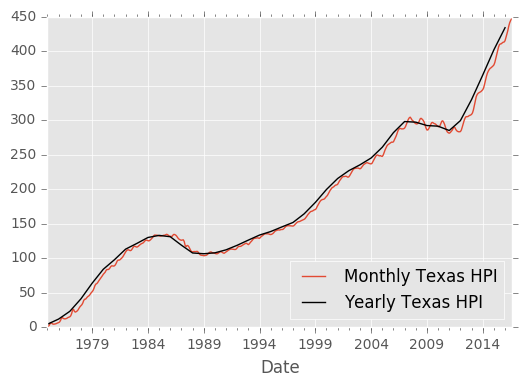

In [28]:
fig = plt.figure();
ax1 = plt.subplot2grid((1, 1), (0, 0));

HPI_data["TX"].plot(ax = ax1, label = "Monthly Texas HPI");
TX_year.plot(ax = ax1, color = "k", label = "Yearly Texas HPI");
plt.legend(loc = 4);
plt.show();

                 open       high        low      close
Date                                                  
1975-12-31   0.000000   6.099286   0.000000   5.891854
1976-12-31   6.301948  14.218217   6.301948  14.218217
1977-12-31  14.742006  29.395393  14.742006  29.395393
1978-12-31  30.804662  49.589010  30.804662  49.589010
1979-12-31  51.070726  74.325257  51.070726  74.325257


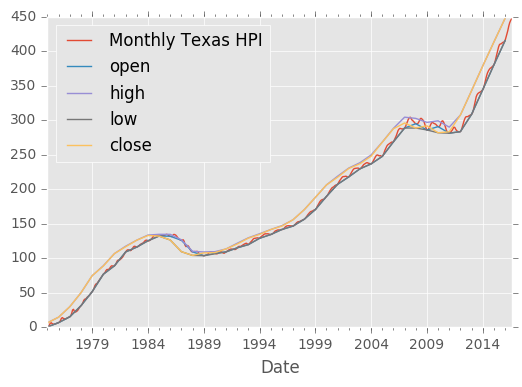

In [34]:
TX_year_ohlc = HPI_data["TX"].resample("A").ohlc(); 
print(TX_year_ohlc.head());

fig = plt.figure();
ax1 = plt.subplot2grid((1, 1), (0, 0));

HPI_data["TX"].plot(ax = ax1, label = "Monthly Texas HPI");
TX_year_ohlc.plot(ax = ax1);
plt.legend(loc = 2);
plt.show();